In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import json
import string
import re
from collections import Counter

In [5]:
# Import the dataset
with open("data/politifact.json") as json_file:
    data = json.load(json_file)

# The dataset is imported and the first five rows are shown.
# Head of dataset
politifact = pd.DataFrame(data)
politifact.head(5)    

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,2019-6-28,Viral image,2019-6-27,a post,https://www.politifact.com/factchecks/2019/jun...,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",None
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,2019-6-6,Facebook posts,2019-6-4,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",None
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,2019-6-6,Viral image,2019-6-28,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",None
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,2019-6-12,Conservative Daily Post,2019-6-10,a post,https://www.politifact.com/factchecks/2019/jun...,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",None
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,2019-3-29,Facebook posts,2019-3-20,a Facebook post,https://www.politifact.com/factchecks/2019/mar...,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",None


In [6]:
# Dimensions of dataset
politifact.shape

(18379, 12)

In [7]:
# Import the dataset
with open("data/snopes.json") as json_file:
    data = json.load(json_file)
    
# The dataset is imported and the first five rows are shown.
# Head of dataset
snopes = pd.DataFrame(data)
snopes.head(5)    

,label,claim,doc,factchecker,published,url,topic,sources,extra_description
0,False,Storing a car battery on a concrete floor will...,Much of what makes a car go remains an arcane ...,Snopes Staff,2011-1-4,https://www.snopes.com/fact-check/battery-park/,"[Automobiles, Techno File]","[{'description': 'Magliozzi, Tom and Ray. “Cli...",None
1,True,U.S. President Donald Trump tapped World Wrest...,"In mid-April 2020, controversy consumed the Tr...",Bethania Palma,2020-4-16,https://www.snopes.com/fact-check/coronavirus-...,"[Politics, COVID-19]","[{'description': 'McGeorge, Alistair.“Donald T...",None
2,True,An image shows a restaurant receipt displaying...,"In May 2020, social media users began sharing ...",David Mikkelson,2020-5-13,https://www.snopes.com/fact-check/covid-surcha...,"[Business, COVID-19]","[{'description': 'Deere, Michael. “Several Wes...",None
3,Outdated,A massive human-made sinkhole opened up in Gua...,"In early October 2019, readers searched the Sn...",Bethania Palma,2019-10-9,https://www.snopes.com/fact-check/guatemala-si...,[Science],"[{'description': 'Than, Ker. “Guatemala Sinkho...",None
4,True,"Police in Crawford County, Georgia forced loca...","In December 2017, disturbing reports surfaceed...",Dan MacGuill,2017-12-7,https://www.snopes.com/fact-check/georgia-poli...,"[Critter Country, animal cruelty, animals, cra...","[{'description': 'Shaw, Mary Grace; Plaskowsky...",None


In [8]:
# Dimensions of dataset
snopes.shape

(3919, 9)

In [9]:
data = pd.concat([politifact, snopes], ignore_index=True, sort=False)
data.head(5)

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary,extra_description
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,2019-6-28,Viral image,2019-6-27,a post,https://www.politifact.com/factchecks/2019/jun...,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",None,NaN
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,2019-6-6,Facebook posts,2019-6-4,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",None,NaN
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,2019-6-6,Viral image,2019-6-28,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",None,NaN
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,2019-6-12,Conservative Daily Post,2019-6-10,a post,https://www.politifact.com/factchecks/2019/jun...,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",None,NaN
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,2019-3-29,Facebook posts,2019-3-20,a Facebook post,https://www.politifact.com/factchecks/2019/mar...,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",None,NaN


In [10]:
# Dimensions of dataset
data.shape

(22298, 13)

In [11]:
# Tail of dataset
data.tail(5)

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary,extra_description
22293,Giant pythons were discovered in a small creek...,A Facebook appearing to link to a genuine news...,False,Dan Evon,2017-7-3,NaN,NaN,NaN,https://www.snopes.com/fact-check/giant-python...,"[Junk News, giant python, prank, python]","[{'description': 'Siciliano, Leon. “Watch: Hug...",NaN,None
22294,Posting a legal notice on your Facebook wall o...,Messages about protecting your copyright or p...,False,David Mikkelson,2012-6-4,NaN,NaN,NaN,https://www.snopes.com/fact-check/facebook-pos...,"[Technology, facebook]","[{'description': 'Ngak, Chenda. “Viral “Facebo...",NaN,None
22295,White House Press Secretary Sean Spicer said P...,A few days after President Trump inadvertently...,False,Kim LaCapria,2017-6-8,NaN,NaN,NaN,https://www.snopes.com/fact-check/spicer-spell...,"[Junk News, covfeve, sean spicer, uspoln]",None,NaN,None
22296,One of the winners who shared the $1.5 billion...,One of the multitude of news stories (exaggera...,False,David Mikkelson,2016-1-17,NaN,NaN,NaN,https://www.snopes.com/fact-check/powerball-wi...,[Junk News],None,NaN,None
22297,Acclaimed actor Morgan Freeman died in October...,"On 5 October 2017, a falsestory announcing act...",False,Kim LaCapria,2017-10-10,NaN,NaN,NaN,https://www.snopes.com/fact-check/morgan-freem...,"[Junk News, action news 3, celebrity death hoa...",None,NaN,None


In [ ]:
data.isnull().sum()

In [12]:
# Removing the unnecessary
data.drop(["published"],axis=1,inplace=True)
data.drop(["date_stated"],axis=1,inplace=True)
data.drop(["url"],axis=1,inplace=True)
data.drop(["summary"],axis=1,inplace=True)
data.drop(["extra_description"],axis=1,inplace=True)
data.head(5)

,claim,doc,label,factchecker,speaker,stated_in,topic,sources
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'..."
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',..."
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',..."
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di..."
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019..."


In [13]:
data['target'] = pd.NA
data['text'] = pd.NA

In [14]:
data.isnull().sum()

claim              0
doc                0
label              0
factchecker      120
speaker         3919
stated_in       4098
topic              0
sources          919
target         22298
text           22298
dtype: int64

In [15]:
data.head(5)

,claim,doc,label,factchecker,speaker,stated_in,topic,sources,target,text
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",<NA>,<NA>
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",<NA>,<NA>
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",<NA>,<NA>
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",<NA>,<NA>
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",<NA>,<NA>


In [16]:
data.shape

(22298, 10)

In [18]:
data['text'] = data['claim'] + " " + data['doc']

In [19]:
del data['claim']
del data['doc']
data.head()

,label,factchecker,speaker,stated_in,topic,sources,target,text
0,false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",<NA>,There were no American flags at the first Demo...
1,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",<NA>,"Quotes Thomas Jefferson as saying that ""a gove..."
2,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",<NA>,Leaving @[4:0] as a Facebook comment can revea...
3,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",<NA>,"""Disease-ridden"" migrants from parts of Africa..."
4,false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",<NA>,Says Islamic studies professor Tariq Ramadan s...


In [20]:
data['label'] = data['label'].apply(lambda x: x.lower())
data.label.replace("mostly true", "mostly-true", inplace=True)

In [21]:
# How many articles per subject?
data['label'].value_counts()

false                   5875
half-true               3334
mostly-true             3270
barely-true             3007
true                    2943
pants-fire              2151
mixture                  407
mostly false             241
unproven                 236
full-flop                152
miscaptioned             140
labeled satire           121
legend                    83
half-flip                 68
correct attribution       66
outdated                  64
misattributed             55
scam                      49
no-flip                   25
lost legend                9
research in progress       2
Name: label, dtype: int64

In [22]:
# Drop data where label is indecisive.
data = data.drop(data[(data.label == "research in progress") | (data.label == "unproven") | (data.label == "mixture") | (data.label == "lost legend") | (data.label == "outdated") | (data.label == "legend") | (data.label == "no-flip") | (data.label == "half-flip") | (data.label == "full-flop") | (data.label == "labeled satire") | (data.label == "miscaptioned")].index)

In [23]:
data.shape

(20991, 8)

In [24]:
# How many articles per subject?
data['label'].value_counts()

false                  5875
half-true              3334
mostly-true            3270
barely-true            3007
true                   2943
pants-fire             2151
mostly false            241
correct attribution      66
misattributed            55
scam                     49
Name: label, dtype: int64

In [26]:
data = data.reset_index()
del data['index']

In [27]:
for i in range(data.shape[0]):
    if data.at[i, 'label'] == "true" or data.at[i, 'label'] == "half-true" or data.at[i, 'label'] == "mostly-true" or data.at[i, 'label'] == "barely-true" or data.at[i, 'label'] == "correct attribution":
      data.at[i, 'target'] =  "true"
    else:
      data.at[i, 'target'] =  "false"

In [28]:
# Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [29]:
data.head(5)

,label,factchecker,speaker,stated_in,topic,sources,target,text
0,false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",false,There were no American flags at the first Demo...
1,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",false,"Quotes Thomas Jefferson as saying that ""a gove..."
2,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",false,Leaving @[4:0] as a Facebook comment can revea...
3,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",false,"""Disease-ridden"" migrants from parts of Africa..."
4,false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",false,Says Islamic studies professor Tariq Ramadan s...


In [30]:
data.text = data.text.apply(remove_punctuations)
data.text = data.text.apply(remove_characters)

In [31]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [32]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oleespe/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head(5)

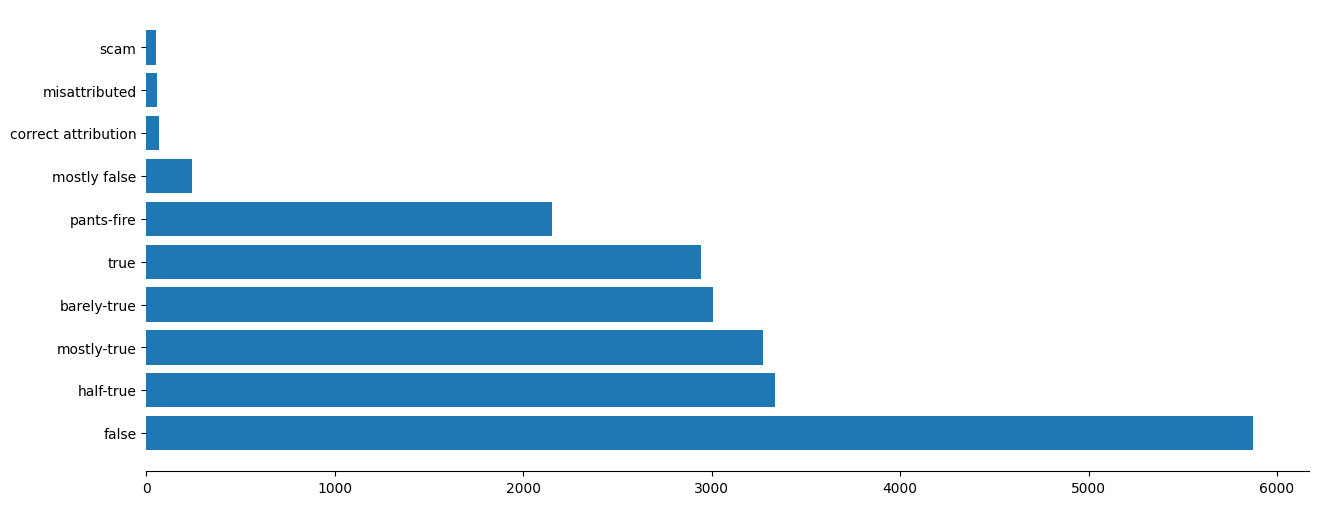

In [33]:
plt.figure(figsize=(15,6))
plt.barh(data.label.value_counts().keys(), data.label.value_counts().values)
sns.despine(left=True)
plt.show()

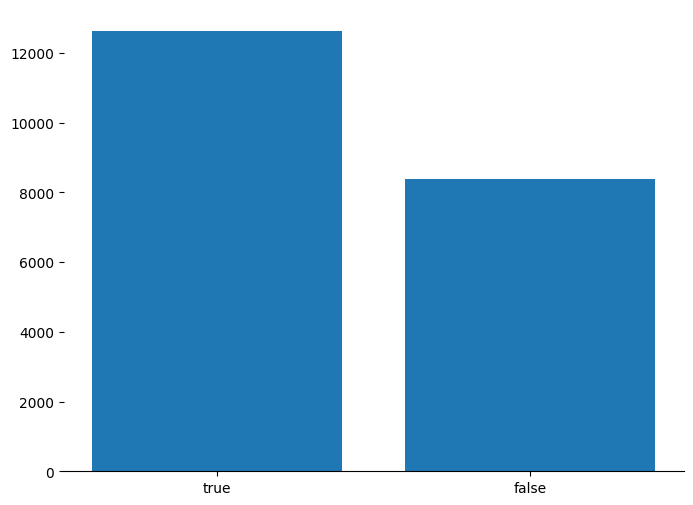

In [34]:
plt.figure(figsize=(8,6))
plt.bar(data.target.value_counts().keys(), data.target.value_counts().values)
sns.despine(left=True)
plt.show()

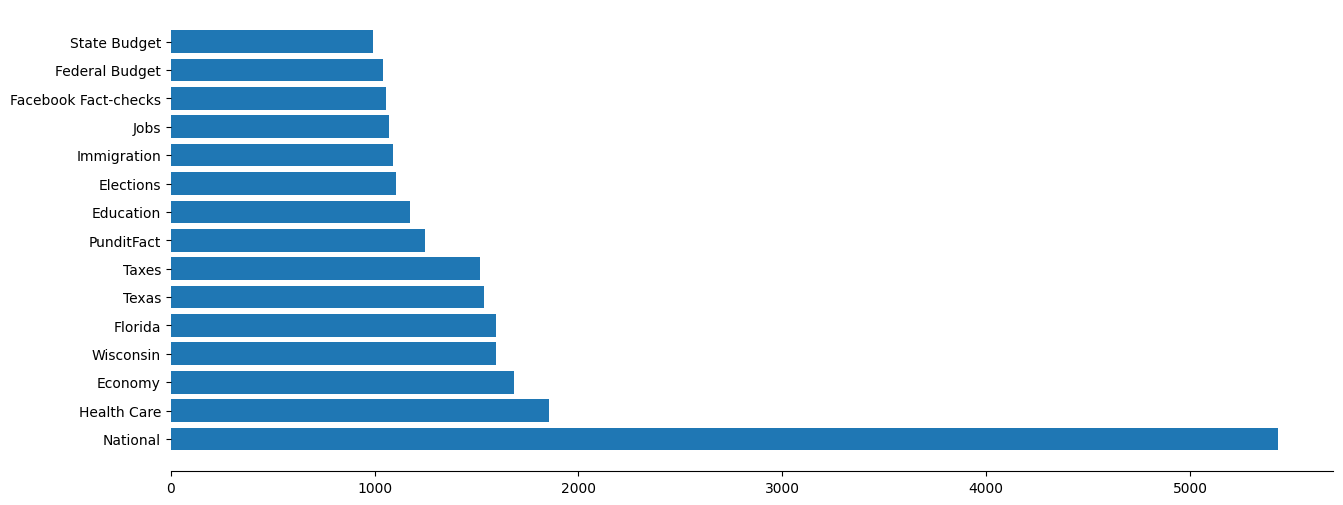

In [35]:
subject_list = Counter([item for sublist in list(data.topic) for item in sublist])

plt.figure(figsize=(15,6))
plt.barh([category[0] for category in subject_list.most_common(15)], [category[1] for category in subject_list.most_common(15)])
sns.despine(left=True)
plt.show()

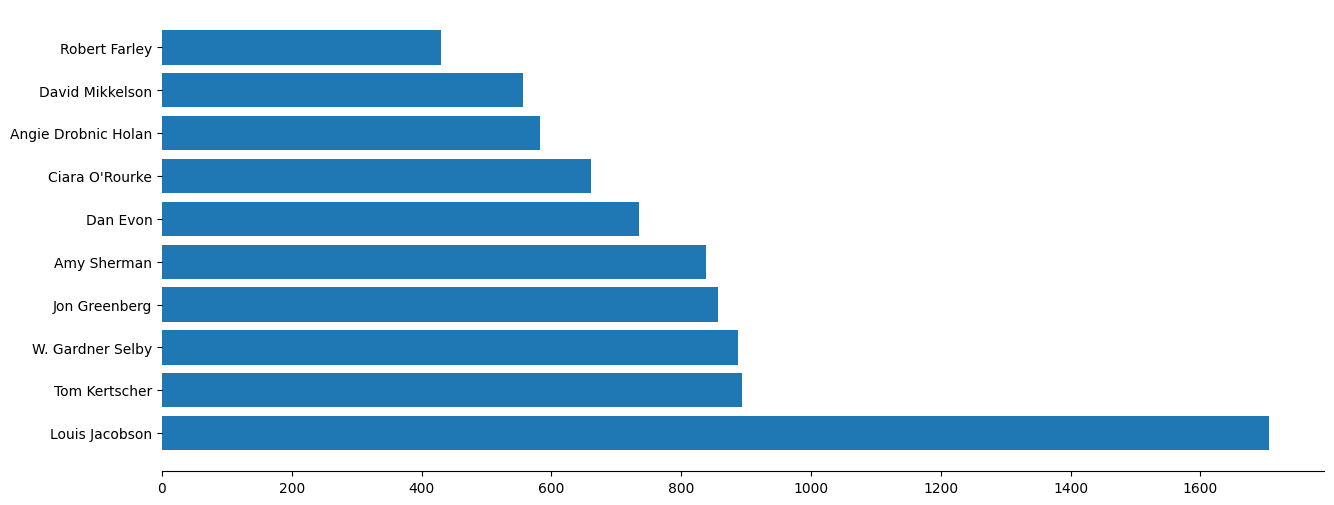

In [36]:
plt.figure(figsize=(15,6))
plt.barh(data.factchecker.value_counts().head(10).keys(), data.factchecker.value_counts().head(10).values)
sns.despine(left=True)
plt.show()

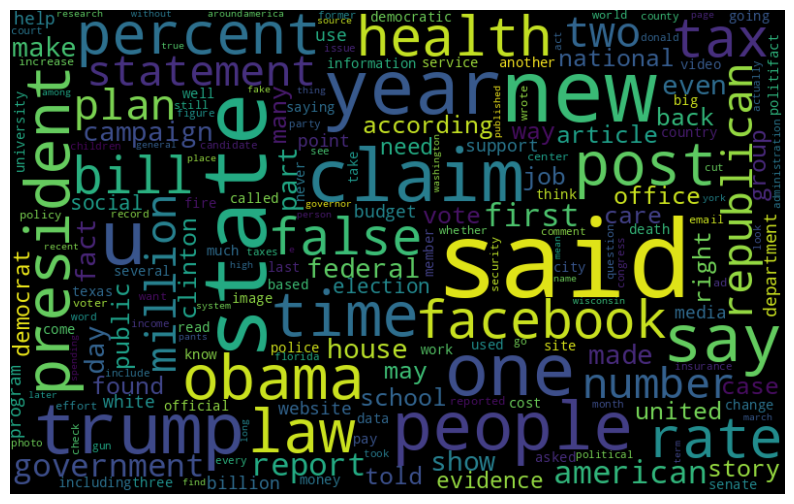

In [38]:
from wordcount import WordCloud

fake_data = data.loc[(data['target'] == "false")]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

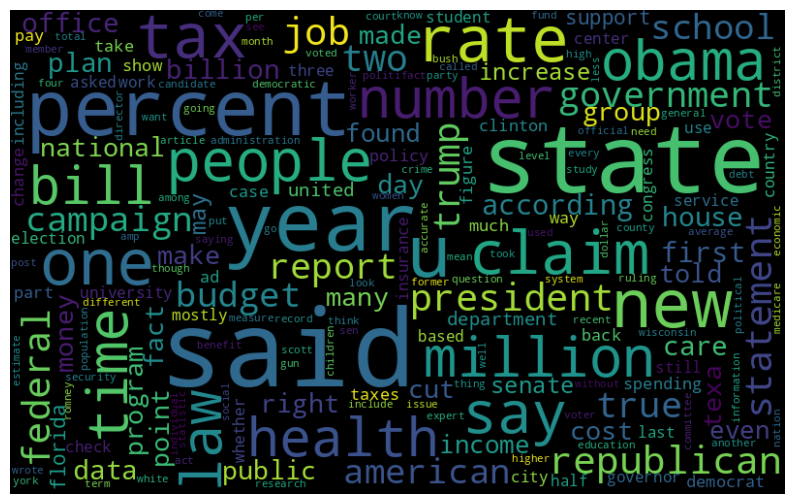

In [39]:
true_data = data.loc[(data['target'] == "true")]
all_words = ' '.join([text for text in true_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

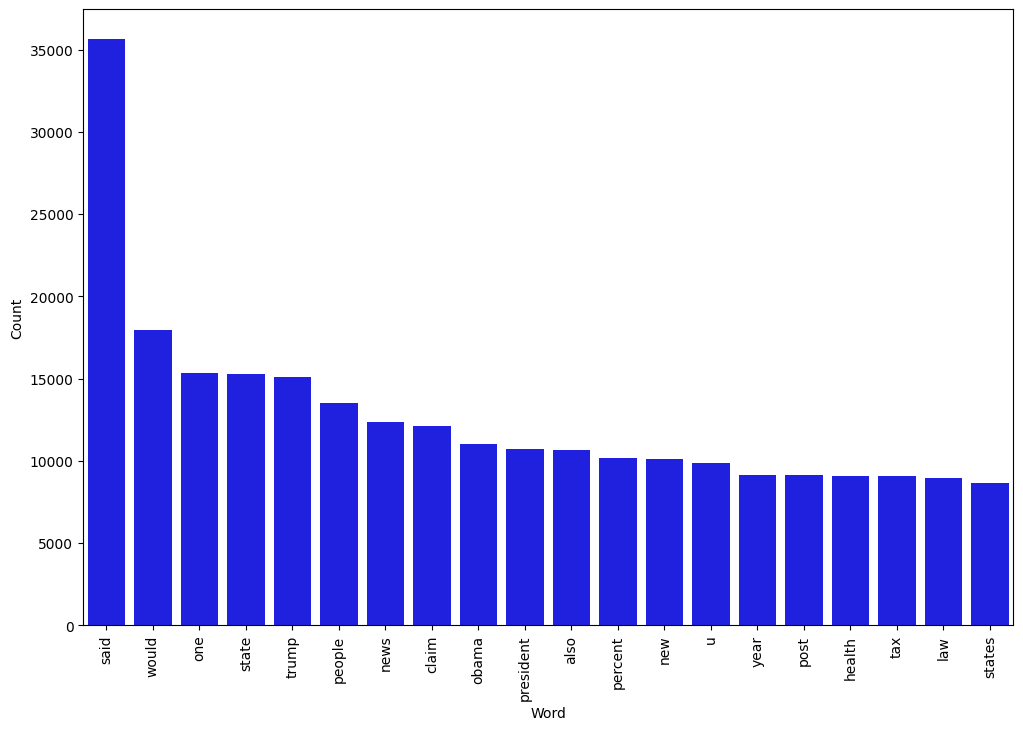

In [42]:
# Most frequent words in fake news
counter(fake_data, "text", 20)

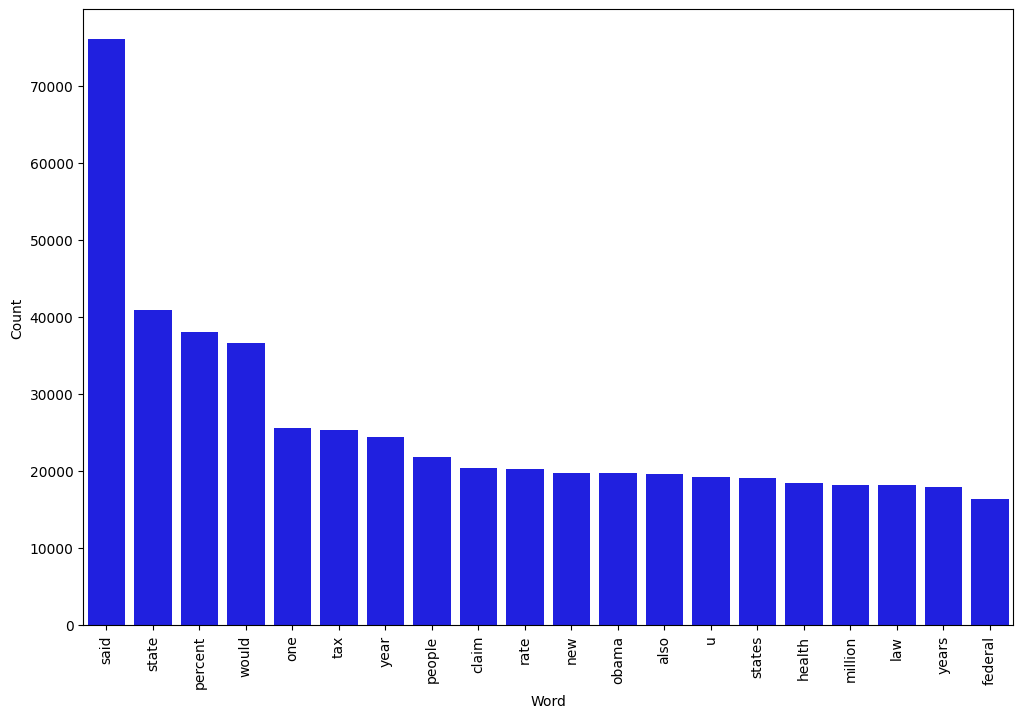

In [43]:
# Most frequent words in true news
counter(true_data, "text", 20)

In [95]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Helper function
def getModelName(modelType):
    if modelType == 'NB':
        return 'Naive Bayes'
    if modelType == 'LR':
        return 'Logistic Regression'
    if modelType == 'DT':
        return 'Decision Tree'
    if modelType == 'RF': 
        return 'Random Forest'
    if modelType == 'MLP':
        return 'Multi-layer Perceptron'
    return ''

def applyMLModel(X_train, y_train, X_test, y_test, pipeline, modelType='LR'):
    modelName = getModelName(modelType)
    if modelName == '':
        raise ValueError("invalid model type")

    model = pipeline.fit(X_train, y_train)
    prediction = model.predict(X_test)
        
    print('MachineLearning Model:', modelName)
    print('='*100)
    print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

    print('='*100)

    cm = metrics.confusion_matrix(y_test, prediction)
    print(cm)
    # Plot CONFUSION MATRIX

    categories = ['fake', 'true']
    sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'BuPu', xticklabels=categories, yticklabels=categories)
    plt.ylabel('True Value')
    plt.xlabel('Predicted value')   
    plt.title("Confusion Matrix of " + str(modelName))         

In [93]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data.text, data.target, test_size=0.2, random_state=42)

MachineLearning Model: Naive Bayes
Accuracy: 72.95%
[[ 641 1020]
 [ 116 2422]]


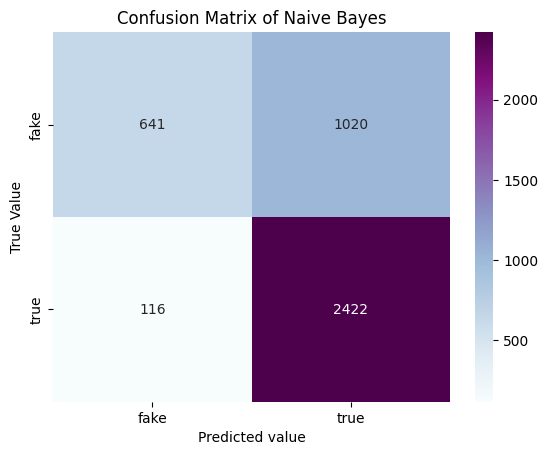

In [96]:
dct = dict()
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', MultinomialNB())
    ]), 
    "NB"
)

MachineLearning Model: Logistic Regression
Accuracy: 79.61%
[[1023  638]
 [ 218 2320]]


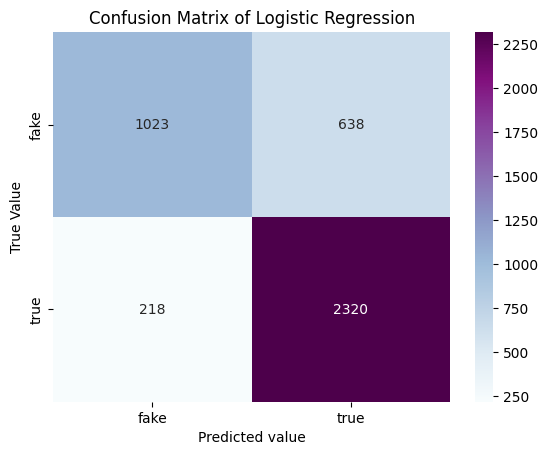

In [97]:
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', LogisticRegression())
    ]), 
    "LR"
)

MachineLearning Model: Decision Tree
Accuracy: 90.97%
[[1497  164]
 [ 215 2323]]


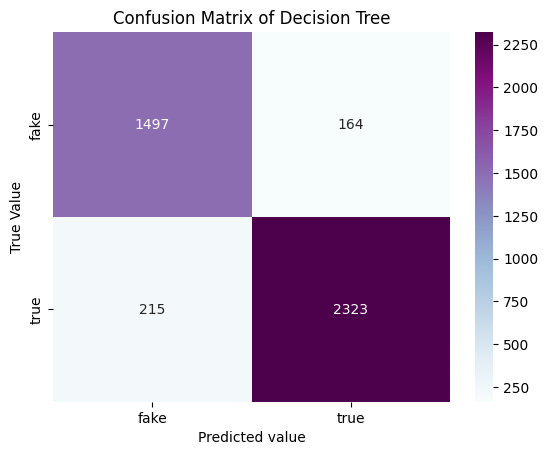

In [98]:
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', DecisionTreeClassifier(criterion= 'entropy',
                                        max_depth = 20, 
                                        splitter='best', 
                                        random_state=42))
    ]),
    "DT"
)

MachineLearning Model: Random Forest
Accuracy: 79.8%
[[1004  657]
 [ 191 2347]]


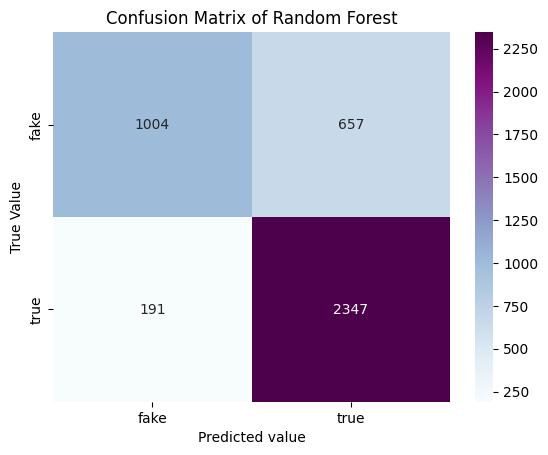

In [99]:
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))
    ]),
    "RF"
)

MachineLearning Model: Multi-layer Perceptron
Accuracy: 71.26%
[[1240  421]
 [ 786 1752]]


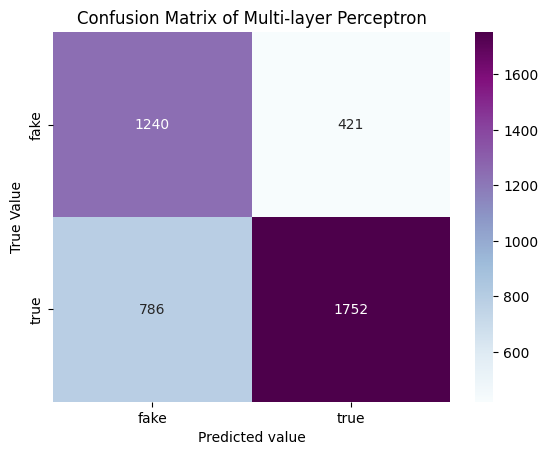

In [100]:
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect' , CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
    ]),
    "MLP"
)